#Modelo para pronóstico de materiales para el aseguramiento del servicio FTTH en la Empresa de Telecomunicaciones de Bogotá ETB S.A. E.S.P.

##Preparación de los datos

Se tuvo acceso a un universo de 7M de datos correspondientes a los materiales utilizados desde enero del año 2018 a octubre del año 2021 para los aprovisionamientos y aseguramientos del servicio de Internet masivo. Se realizaron los procesos de Extracción Transformación y Carga (ETLs) que permitieron tener acceso a la información estructurada. 3.8M corresponden a servicios de fibra óptica hasta el hogar (FTTH) de 82 referencias de material, dentro de los cuales 1.34M corresponden exclusivamente al aseguramiento del servicio y son el universo de datos analizados.

Haciendo el análisis descriptivo de los datos de aseguramiento se encuentra que en 18 referencias se concentra el 99% de los materiales utilizados para el aseguramiento; por lo cual, considerando la cantidad de ceros que se encuentran en las series de tiempo de los materiales restantes y la dificultad subyacente en el entrenamiento de los modelos, sólo se realiza el pronóstico para estas 18 referencias.

Se seleccionaron los sistemas LSTMs (Long Short-Time Memory) dado que son ampliamente usados para hacer pronósticos de series de tiempo.

Se tomaron los datos de cada material, en el ejemplo mostrado MT118 (Material que corresponde al SetupBox Huawei y es requerido en el 43% de los casos de aseguramiento), para a partir del comportamiendo de los meses anteriores poder pronosticar el siguiente. 

para el entrenamiento del modelo se tomaron los 3 periodos anteriores al de la predicción.

Posterior a la preparación de los datos se aplicaron los siguientes 5 modelos:

<ol>
<li>LSTM vainilla
<li>LSTM apilado
<li>LSTM bidireccional
<li>LSTM con Red Neuronal Convolucional
<li>LSTM convolucional
</ol>

# Fuente de datos

>Haciendo el análisis descriptivo de los datos de aseguramiento se encuentra que en 18 referencias se concentra el 99% de los materiales utilizados para el aseguramiento; por lo cual, considerando la cantidad de ceros que se encuentran en las series de tiempo de los materiales restantes y la dificultad subyacente en el entrenamiento de los modelos, sólo se realiza el pronóstico para estas 18 referencias.

In [ ]:
#import libraries
from pandas import read_csv
#read files
serie = read_csv('http://tiendahjm.com/MTA.txt', sep="\t", parse_dates=True, squeeze=True)
serie.head()

In [ ]:
serie['cantidad'].sum()

172667

In [ ]:
#serie.dtypes

In [ ]:
#serie.describe()

In [ ]:
#(serie.isna().sum()/len(serie))*100

In [ ]:
pip install --upgrade plotly

In [ ]:
#df_plot = df_plot[df_plot['value']!=0]
serie = serie[serie['cantidad']!=0]

In [ ]:
import plotly.express as px
import numpy as np
fig = px.treemap(serie, path=[px.Constant('material') ,'material'], values='cantidad',
                 color='cantidad', hover_data=['descripcion'],
                 title='Consumo materiales aseguramiento red FTTH  - enero 2019 a 2021*',
                 color_continuous_scale=px.colors.sequential.Blues)
fig.show()


https://plotly.com/python/plotly-express/

In [ ]:
import plotly.express as px

fig = px.line(serie, x='fecha', y='cantidad', color='material', markers=True, hover_name='descripcion',
              title='Consumo materiales aseguramiento red FTTH  - enero 2020 a 2021*',
              color_discrete_sequence=px.colors.qualitative.T10)
fig.show()

In [ ]:
'''
import plotly.express as px

fig = px.bar(serie, x='fecha', y='cantidad', color='material',hover_name='descripcion',
            title='Consumo materiales aseguramiento red FTTH  - enero 2020 a 2021*',
            color_discrete_sequence=px.colors.qualitative.T10)
fig.show()
'''

"\nimport plotly.express as px\n\nfig = px.bar(serie, x='fecha', y='cantidad', color='material',hover_name='descripcion',\n            title='Consumo materiales aseguramiento red FTTH  - enero 2020 a 2021*',\n            color_discrete_sequence=px.colors.qualitative.T10)\nfig.show()\n"

In [ ]:

import plotly.express as px

fig = px.pie(serie, values='cantidad', names='material',
             title='Consumo materiales aseguramiento red FTTH  - enero 2020 a 2021*',
             hover_data=['descripcion'], labels={'descripcion':'descripcion'})

fig.update_traces(textposition='inside', textinfo='percent+label')
fig.show()


In [ ]:
serie_n = read_csv('http://tiendahjm.com/MTA_NODO.txt', sep="\t", parse_dates=True, squeeze=True)

In [ ]:
import plotly.express as px
import numpy as np
fig = px.treemap(serie_n, path=[px.Constant('material'),'nodo','material'], values='cantidad',
                 color='cantidad', hover_data=['descripcion'],
                 title='Consumo materiales aseguramiento red FTTH  - enero 2020 a 2021*',
                 color_continuous_scale=px.colors.sequential.PuBu)
fig.show()

In [ ]:
from pandas import pivot_table
from numpy import nan
MTS_MES = pivot_table(serie, values = 'cantidad', index = 'material', columns = 'fecha')
MTS_MES.replace(nan, 0)

In [ ]:
import plotly.express as px
import xarray as xr
# Load xarray from dataset included in the xarray tutorial

fig = px.imshow(MTS_MES, color_continuous_scale='GnBu',
                 title='Head Map consumo materiales aseguramiento red FTTH  - enero 2020 a 2021*',)
fig.show()

#https://plotly.com/python/builtin-colorscales/

# Delimitación de inventario

In [ ]:
#import libraries
from pandas import read_csv
#read files
data = read_csv('http://tiendahjm.com/MTA21.txt', sep="\t", parse_dates=True, squeeze=True)
data.head(2)

,material,fecha,descripcion,mes,anio,cantidad
0,MT118,2019-01-01,STB MARCA HUAWEI,1,2019,110
1,MT144,2019-01-01,LAN SWITCH,1,2019,11


In [ ]:
import plotly.express as px
import numpy as np
fig = px.treemap(data, path=[px.Constant('material') ,'material'], values='cantidad',
                 color='cantidad', hover_data=['descripcion'],
                 title='Consumo materiales aseguramiento red FTTH  - enero 2020 a 2021*',
                 color_continuous_scale=px.colors.sequential.Blues)
fig.show()

In [ ]:
import plotly.express as px

fig = px.bar(data, x='fecha', y='cantidad', color='material',hover_name='descripcion',
              title='Consumo materiales aseguramiento red FTTH  - enero 2020 a 2021*',
              color_discrete_sequence=px.colors.qualitative.Set2)
fig.show()

In [ ]:
import plotly.express as px

fig = px.line(data, x='fecha', y='cantidad', color='material', markers=True, hover_name='descripcion',
              title='Consumo materiales aseguramiento red FTTH  - enero 2020 a 2021*',
              color_discrete_sequence=px.colors.qualitative.T10)
fig.show()

In [ ]:
serie_n = read_csv('http://tiendahjm.com/MTA21_NODO.txt', sep="\t", parse_dates=True, squeeze=True)

import plotly.express as px
import numpy as np
fig = px.treemap(serie_n, path=[px.Constant('material'),'nodo','material'], values='cantidad',
                 color='cantidad', hover_data=['descripcion'],
                 title='Consumo materiales aseguramiento red FTTH  - enero 2020 a 2021*',
                 color_continuous_scale=px.colors.sequential.PuBu)
fig.show()

In [ ]:
from pandas import pivot_table
from numpy import nan
MTS18_MES = pivot_table(data, values = 'cantidad', index = 'material', columns = 'fecha')
MTS18_MES.replace(nan, 0)

In [ ]:
import plotly.express as px
import xarray as xr
# Load xarray from dataset included in the xarray tutorial

fig = px.imshow(MTS18_MES, color_continuous_scale='GnBu',
                 title='Head Map consumo materiales aseguramiento red FTTH  - enero 2020 a 2021*',)
fig.show()

#https://plotly.com/python/builtin-colorscales/

In [ ]:
import plotly.express as px

fig = px.pie(data, values='cantidad', names='material',
            title='Consumo materiales aseguramiento red FTTH  - enero 2020 a 2021*',
             hover_data=['descripcion'], labels={'descripcion':'descripcion'})

fig.update_traces(textposition='inside', textinfo='percent+label')
fig.show()

# Análisis de series de tiempo


Se desea indentificar el comportamiento del consumo de materiales seleccionados

In [ ]:
MTS18_MES = pivot_table(data, values = 'cantidad', index = 'fecha', columns = 'material')
MTS18_MES.replace(nan, 0)
MTS18_MES=MTS18_MES.reset_index() # eliminar indice 
MTS18_MES.head()

In [ ]:
#Construcción data frame con información a analizar
serie = MTS18_MES.loc[:,['fecha','MT118']]
import plotly.express as px
import numpy as np
fig = px.line(serie, x='fecha', y='MT118',
              title='Consumo material MT118  - enero 2020 a 2021*')
fig.show()

Para realizar el análisis primero debemos validar si la serie de datos es **estacional** y se cumplen los siguientes supuestos:

*   La media no dependa del tiempo
*   La varianza no dependa del tiempo
*   La autocorrelacion no dependa del tiempo

Para confirmar si el consumo del material **'MT118'** es estacional usamos la prueba de **Dickey Fuller**

In [ ]:
from statsmodels.tsa.stattools import adfuller

result = adfuller(serie['MT118'])
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))

ADF Statistic: -2.033027
p-value: 0.272282
Critical Values:
	1%: -3.646
	5%: -2.954
	10%: -2.616


Con el resultado de la prueba (p-vaue = 0.272) podemos afirmar que la serie de consumo del material 'MT118' **no es estacional**. A continuación analizaremos las gráficas de autocorrelación para entender los componentes de autoregresión y promedio móvil.

In [ ]:
from statsmodels.tsa.stattools import adfuller

result = adfuller(serie['MT118'])
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))

ADF Statistic: -2.033027
p-value: 0.272282
Critical Values:
	1%: -3.646
	5%: -2.954
	10%: -2.616


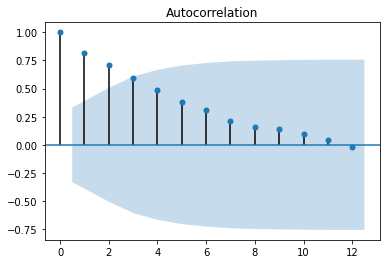

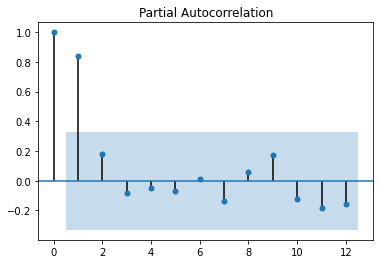

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
plot_acf(serie['MT118'], lags=12);
plot_pacf(serie['MT118'], lags=12);